In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("D:\ML_ASS\lab04-mahak-khurdia\data-preprocessing-and-regression-with-scikit-learn-Mahak-Khurdia\kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Task 1: Advanced Exploratory Data Analysis (EDA) & Feature Engineering

### 5% missing values into 'sqft_lot' and 'bathrooms'

In [32]:

np.random.seed(42)


for col in ['sqft_lot', 'bathrooms']:
    n_missing = int(0.05 * len(df))  # 5% of rows
    missing_value = np.random.choice(df.index, n_missing, replace=False)
    df.loc[missing_value, col] = np.nan


print(df[['sqft_lot', 'bathrooms']].isnull().sum())


sqft_lot     1080
bathrooms    1080
dtype: int64


In [57]:
df['sqft_lot']=df['sqft_lot'].fillna(df['sqft_lot'].mean())
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].mode()[0])

print(df[['sqft_lot', 'bathrooms']].isnull().sum())

sqft_lot     0
bathrooms    0
dtype: int64


### Outlier Detection and Handling:

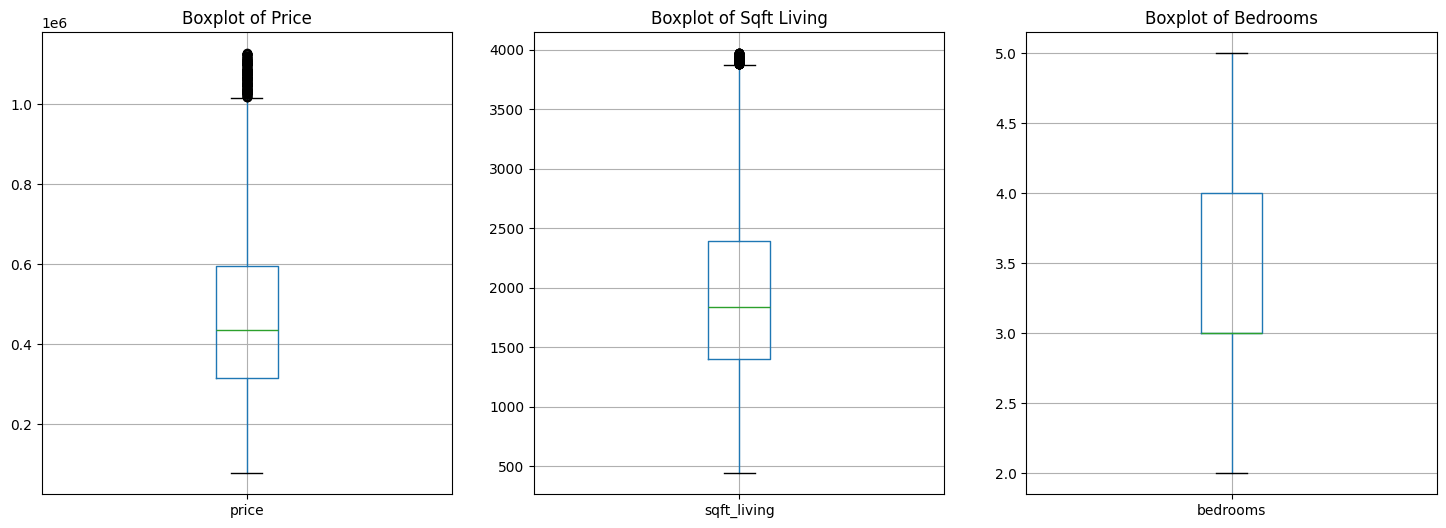

In [58]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

df.boxplot(column='price', ax=axes[0])
axes[0].set_title("Boxplot of Price")

df.boxplot(column='sqft_living', ax=axes[1])
axes[1].set_title("Boxplot of Sqft Living")

df.boxplot(column='bedrooms', ax=axes[2])
axes[2].set_title("Boxplot of Bedrooms")

plt.show()


In [59]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


cols = ['price', 'sqft_living', 'bedrooms']

for col in cols:
    df = outliers(df, col)

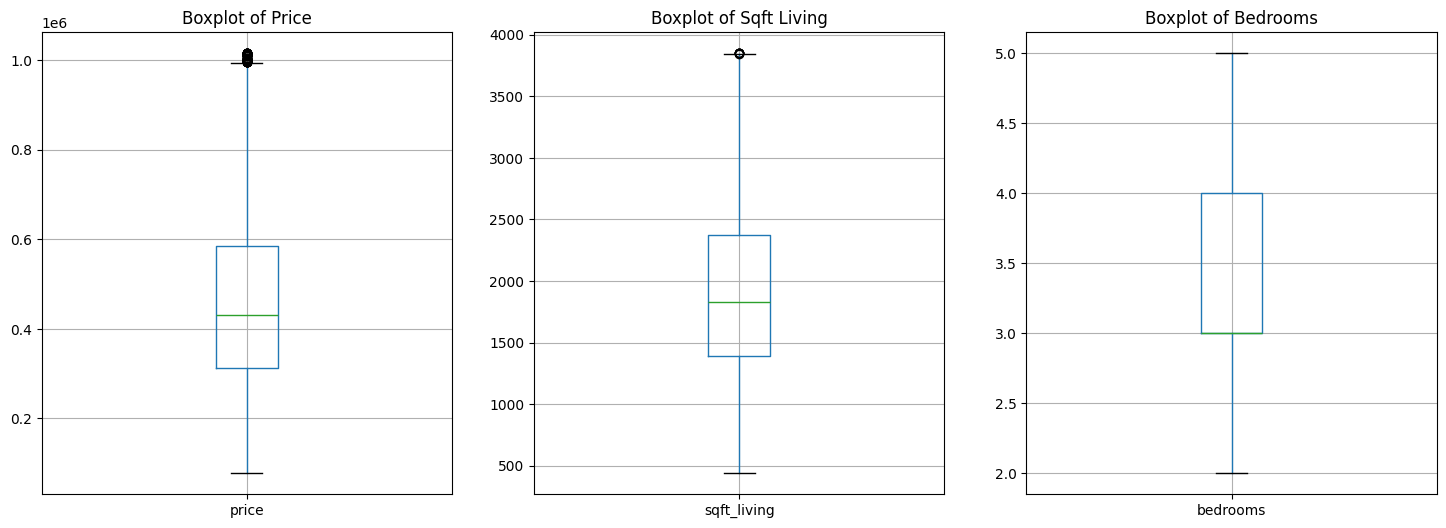

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

df.boxplot(column='price', ax=axes[0])
axes[0].set_title("Boxplot of Price")

df.boxplot(column='sqft_living', ax=axes[1])
axes[1].set_title("Boxplot of Sqft Living")

df.boxplot(column='bedrooms', ax=axes[2])
axes[2].set_title("Boxplot of Bedrooms")

plt.show()

### Create  new features

In [61]:
from datetime import date
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['house_age'] = date.today().year  - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,-122.257,1340,5650,2014,10,70,0,70,1180.0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,-122.319,1690,7639,2014,12,74,1,34,1285.0,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,-122.233,2720,8062,2015,2,92,0,92,770.0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,-122.393,1360,5000,2014,12,60,0,60,1960.0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,-122.045,1800,7503,2015,2,38,0,38,1680.0,0.666667


### Renovation Status

In [62]:

df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)
df.head()

current_year = date.today().year

df['age_since_renovation'] = np.where(
    df['yr_renovated'] != 0,
    current_year - df['yr_renovated'],
    df['house_age']
)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,-122.257,1340,5650,2014,10,70,0,70,1180.0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,-122.319,1690,7639,2014,12,74,1,34,1285.0,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,-122.233,2720,8062,2015,2,92,0,92,770.0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,-122.393,1360,5000,2014,12,60,0,60,1960.0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,-122.045,1800,7503,2015,2,38,0,38,1680.0,0.666667


### Ratio Features

In [63]:

df['sqft_living_per_floor'] = df['sqft_living'] / df['floors'].replace(0, np.nan)
df['bath_per_bed'] = df['bathrooms'] / df['bedrooms'].replace(0, np.nan)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,-122.257,1340,5650,2014,10,70,0,70,1180.0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,-122.319,1690,7639,2014,12,74,1,34,1285.0,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,-122.233,2720,8062,2015,2,92,0,92,770.0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,-122.393,1360,5000,2014,12,60,0,60,1960.0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,-122.045,1800,7503,2015,2,38,0,38,1680.0,0.666667


## Task 2: Build a Sophisticated Preprocessing Pipeline

In [64]:

numerical_features = [
    "sqft_living", "sqft_lot", "sqft_above", "sqft_basement",
    "lat", "long", "sqft_living15", "sqft_lot15", "house_age",
    "age_since_renovation", "sqft_living_per_floor", "bath_per_bed"
]

categorical_features = [
    "zipcode", "sale_month", "sale_year"
]

passthrough_features = [
    "bedrooms", "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "was_renovated"
]

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore') )
])

In [66]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ("numerical", numerical_pipeline, numerical_features),
    ("category", categorical_pipeline, categorical_features),
    ("passthrough", "passthrough", passthrough_features)
])

## Task 3: Model Training and Hyperparameter Tuning


In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

rf_regressor = RandomForestRegressor(random_state=42)
gd_regressor = GradientBoostingRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42, objective="reg:squarederror")


rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", rf_regressor)
])

gd_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", gd_regressor)
])

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", xgb_regressor)
])

In [68]:
from sklearn.model_selection import GridSearchCV

rf_grid = {
    "regressor__n_estimators": [100, 200,250],
    "regressor__max_depth": [10, 20, 50],
    "regressor__min_samples_split": [2, 5]
}

gd_grid = {
    "regressor__n_estimators": [100, 200,300],
    "regressor__learning_rate": [0.05, 0.1,0.2],
    "regressor__max_depth": [3, 5]
}

xgb_grid = {
    "regressor__n_estimators": [100, 200,250],
    "regressor__learning_rate": [0.05, 0.1],
    "regressor__max_depth": [3, 5]
}

In [69]:
search_rf = GridSearchCV(
    rf_pipeline,         
    param_grid=rf_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

search_gd = GridSearchCV(
    gd_pipeline,         
    param_grid=gd_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

search_xgb = GridSearchCV(
    xgb_pipeline,       
    param_grid=xgb_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

In [70]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(columns=['id', 'date', 'price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [71]:
search_rf.fit(X_train, y_train)
print("Best RF params:", search_rf.best_params_)
search_gd.fit(X_train, y_train)
print("Best GD params:", search_gd.best_params_)
search_xgb.fit(X_train, y_train)
print("Best XGB params:", search_xgb.best_params_)

Best RF params: {'regressor__max_depth': 50, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best GD params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Best XGB params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 250}


In [72]:
y_pred_rf = search_rf.best_estimator_.predict(X_test)
y_pred_gd = search_gd.best_estimator_.predict(X_test)
y_pred_xgb = search_xgb.best_estimator_.predict(X_test)

In [73]:
results = {
    "RandomForest": search_rf.best_score_,
    "GradientBoosting": search_gd.best_score_,
    "XGBoost": search_xgb.best_score_
}
print(results)

{'RandomForest': -74305.4986803742, 'GradientBoosting': -68685.51468840009, 'XGBoost': -68869.87426420969}


In [74]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test, y_pred_rf)
r2_gd = r2_score(y_test, y_pred_gd)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("RandomForest Test R²:", r2_rf)
print("GradientBoosting Test R²:", r2_gd)
print("XGBoost Test R²:", r2_xgb)

# Choose best model
results = {
    "RandomForest": r2_rf,
    "GradientBoosting": r2_gd,
    "XGBoost": r2_xgb
}

best_model_name = max(results, key=results.get)
print("Best model based on Test R²:", best_model_name)

# Get the actual trained best model
if best_model_name == "RandomForest":
    best_model = search_rf.best_estimator_
elif best_model_name == "GradientBoosting":
    best_model = search_gd.best_estimator_
else:
    best_model = search_xgb.best_estimator_

RandomForest Test R²: 0.8556914477137124
GradientBoosting Test R²: 0.8766340297892988
XGBoost Test R²: 0.8739577738070943
Best model based on Test R²: GradientBoosting


In [75]:
import numpy as np

y_pred = best_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Model:", best_model_name)
print("Test R²:", r2)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

Best Model: GradientBoosting
Test R²: 0.8766340297892988
Test MAE: 47446.49524944936
Test RMSE: 68206.57019913987


RMSE Improvement: 67.49%
              Model           RMSE
0          Baseline  209786.255677
1  Tuned Best Model   68206.570199


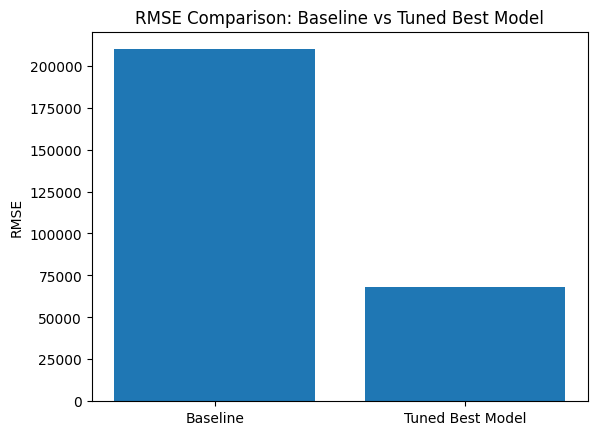

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


baseline_rmse = 209786.255677   
new_rmse = rmse

improvement = ((baseline_rmse - new_rmse) / baseline_rmse) * 100

print(f"RMSE Improvement: {improvement:.2f}%")


comparison_df = pd.DataFrame({
    "Model": ["Baseline", "Tuned Best Model"],
    "RMSE": [baseline_rmse, new_rmse]
})

print(comparison_df)

plt.bar(comparison_df["Model"], comparison_df["RMSE"])
plt.ylabel("RMSE")
plt.title("RMSE Comparison: Baseline vs Tuned Best Model")
plt.show()

In [77]:
def get_feature_importance(best_model, best_model_name):

    regressor = best_model.named_steps["regressor"]

    preprocessor = best_model.named_steps["preprocessor"]
    all_features = preprocessor.get_feature_names_out()

    importances = regressor.feature_importances_

    assert len(all_features) == len(importances), f"Features ({len(all_features)}) and importances ({len(importances)}) mismatch!"

    feat_imp = pd.DataFrame({
        "Feature": all_features,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feat_imp["Feature"][:20], feat_imp["Importance"][:20])
    plt.gca().invert_yaxis()
    plt.xlabel("Feature Importance")
    plt.title(f"Top 20 Features - {best_model_name}")
    plt.show()

    return feat_imp

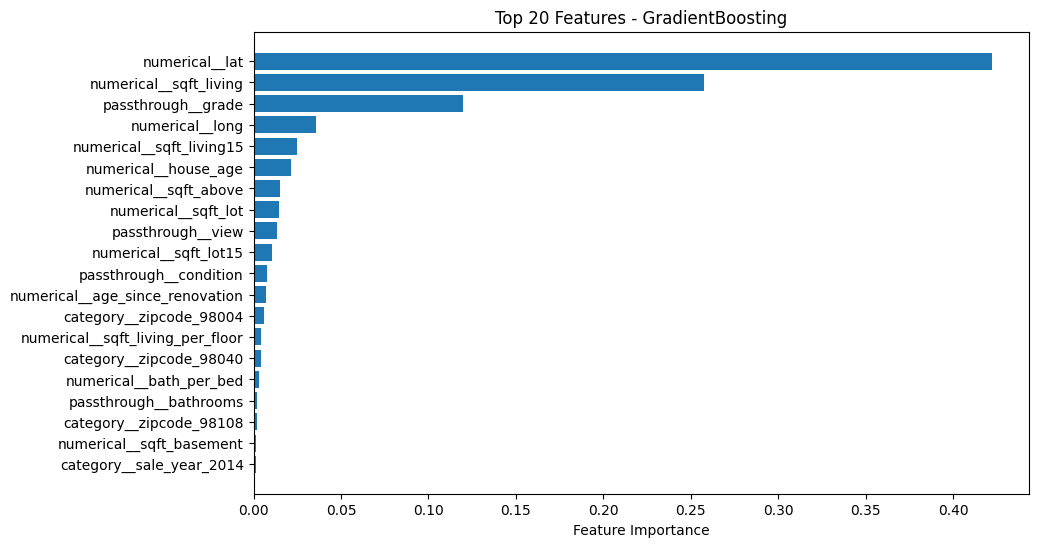

,Feature,Importance
4,numerical__lat,0.422047
0,numerical__sqft_living,0.257345
102,passthrough__grade,0.120021
5,numerical__long,0.035582
6,numerical__sqft_living15,0.025061
8,numerical__house_age,0.021622
2,numerical__sqft_above,0.014872
1,numerical__sqft_lot,0.014553
100,passthrough__view,0.013566
7,numerical__sqft_lot15,0.010598


In [78]:
feat_importance_df = get_feature_importance(best_model, best_model_name)
feat_importance_df.head(20)